# Introduction to Copulas

## Probability Review

Let's start by reviewing some basic probability concepts.

We'll focus specifically on continuous random variables, which is what the Copulas library is primarily intended to support.

### Probability Density Function

A probability density function $f(x)$ captures the likelihood that a random sample from the distribution is equal to $x$. For example, the probability density function for the standard normal distribution is given by

\begin{equation}
f(x) = \frac{1}{2 \pi} e^{-x^2/2}
\end{equation}

Note that the probability density function does **not** return a probability but rather a "relative likelihood" which can take on values in the interval $[0, \infty)$; however, the integral over the probability density function from $-\infty$ to $\infty$ must be equal to one.

### Cumulative Distribution Function

In many cases, the probability density function can be hard to work with directly. Instead, we will use the cumulative distribution function $F(x)$ which is defined as the integral of the probability density function

\begin{equation}
F(x) = \int_{-\infty}^x f(x)
\end{equation}

The below figure shows the probability density function $f(x)$ and the cumulative distribution function $F(x)$ for a normal standard distribution with mean $0.0$ and variance $1$.

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

def plot_cdf_pdf():
    # Generate 10000 evenly distributed values from -1 to 1
    x = np.linspace(-4.0, 4.0, 10000)

    # Compute their Probability Densities and Cumulative Distributions
    pdf = stats.norm.pdf(x)
    cdf = stats.norm.cdf(x)

    figure = plt.figure(figsize=(16, 4))
    figure.add_subplot(1, 2, 1)
    plt.plot(x, pdf)
    plt.title("Probability Density Function")
    plt.xlabel("x")
    plt.ylabel("f(x)")

    figure.add_subplot(1, 2, 2)
    plt.plot(x, cdf)
    plt.title("Cumulative Density Function")
    plt.xlabel("x")
    plt.ylabel("F(x)")

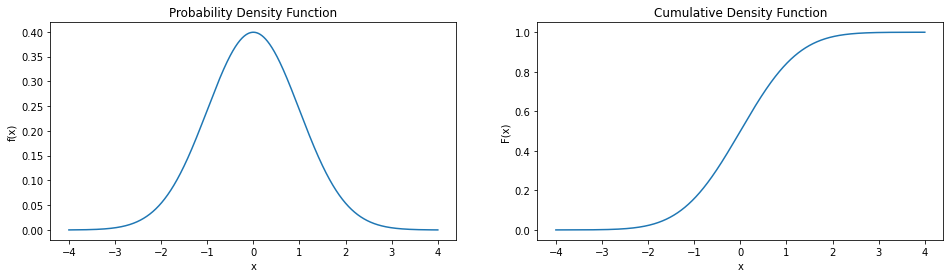

In [3]:
plot_cdf_pdf()

### Probability Integral Transform

The probability integral transform is a key component in our toolkit for working with probability distributions. Suppose we have a random variable $X$ that comes from a distribution with cumulative density function $F(X)$. Then, we can define a random variable $Y$ as

\begin{equation}
Y = F(X)
\end{equation}

and prove that $Y$ follows a uniform distribution over the interval $[0.0, 1.0]$.

The figure below shows an example of this. We sample some data from a normal distribution and plot it on the left. Then, we use the CDF of the normal distribution to transform the data, plot it on the right, and observe that it resembles an uniform distribution.

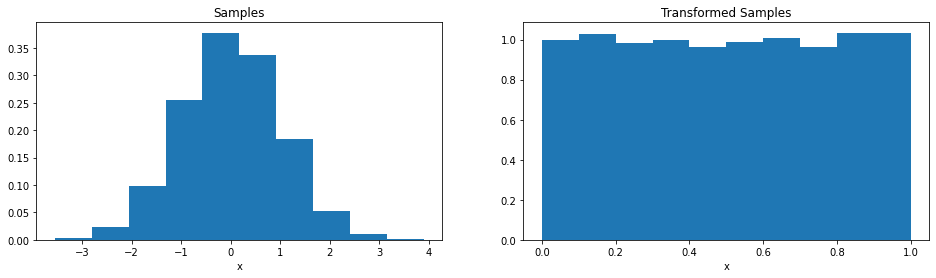

In [4]:
from scipy import stats
from matplotlib import pyplot as plt


X = stats.norm.rvs(size=10000)
X_pit = stats.norm.cdf(X)

fig = plt.figure(figsize=(16, 4))
fig.add_subplot(1, 2, 1)
plt.hist(X, density=True, bins=10)
plt.title("Samples") 
plt.xlabel("x")

fig.add_subplot(1, 2, 2)
plt.hist(X_pit, density=True, bins=10)
plt.title("Transformed Samples")
plt.xlabel("x")

plt.show()

## Copulas

The key intuition underlying copula functions is the idea that marginal distributions can be modeled independently from the joint distribution. For example, consider a dataset with two columns containing age and income. A copula-based modeling approach would:

1. Model age and income independently, transforming them into uniform distributions using the *probability integral transform* explained above.
2. Model the relationship between the transformed variables using the copula function.

In this section, we demonstrate a simplified example of a Gaussian copula.

In [5]:
from copulas.datasets import sample_bivariate_age_income

df = sample_bivariate_age_income()
df.head()

age      income
0  48.935913  399.161393
1  39.234323  364.225531
2  55.659901  406.475105
3  31.810637  341.276022
4  65.342336  414.347815

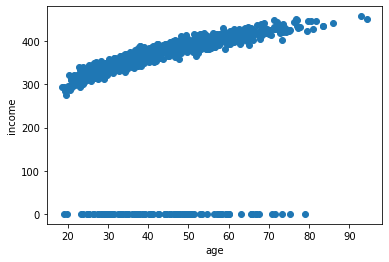

In [6]:
from copulas.visualization import scatter_2d

scatter_2d(df)

Here's what the age and income variables look like separately.

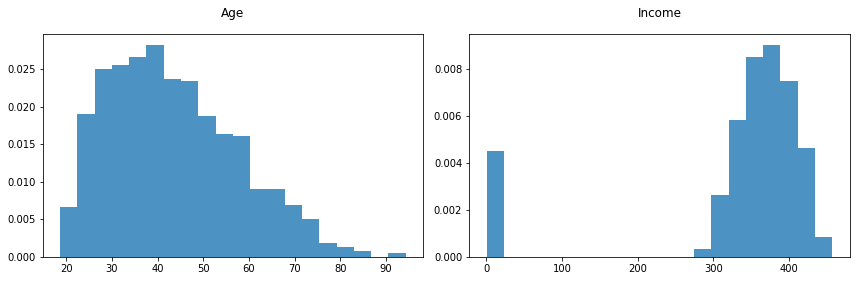

In [7]:
from copulas.visualization import hist_1d, side_by_side

side_by_side(hist_1d, {'Age': df['age'], 'Income': df['income']})

To model this using a Gaussian copula, we can simply run the following:

In [8]:
from copulas.multivariate import GaussianMultivariate

copula = GaussianMultivariate()
copula.fit(df)

The GaussianMultivariate class will automatically transform the columns using the best available distribution; let's take a look at what the transformed age and income variables look like.

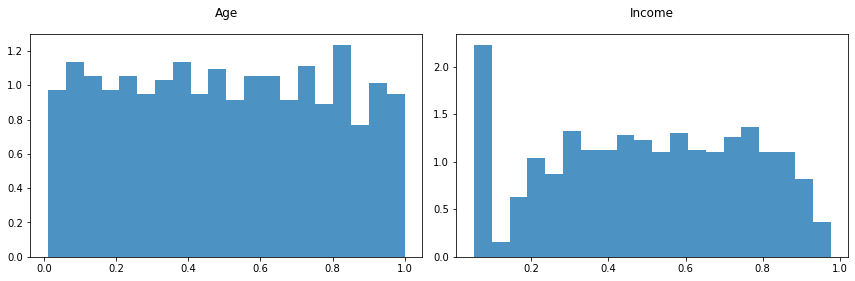

In [9]:
age_cdf = copula.univariates[0].cdf(df['age'])
inc_cdf = copula.univariates[1].cdf(df['income'])

side_by_side(hist_1d, {'Age': age_cdf, 'Income': inc_cdf})

Note that this transformed data looks much more uniform than the original values. Using this transformed data, we can then model the relationship between age and income more easily and generate some synthetic data.

In [10]:
synthetic = copula.sample(len(df))

In [11]:
synthetic.head()

age      income
0  31.907286  304.110961
1  48.012266  371.410661
2  35.805468  360.889437
3  53.500743  350.469573
4  39.832329  350.109369

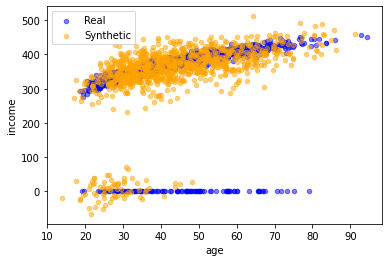

In [12]:
from copulas.visualization import compare_2d

compare_2d(df, synthetic)